# Analisis Exploratorio de los Datos en base a los Dataset obtenidos luego del proceso ETL.

## Se importan las librerías a utilizar para cargar los dataset y la visualización de graficos.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")

## Se cargan los dataset finales

In [3]:
df_final = pd.read_parquet('dataset_final.parquet.gz')
df_final_ord = pd.read_parquet('dataset_final_ord.parquet.gz')

## Mediante un grafico de nube de palabras se obtiene el top 25 de los juegos más comunes.

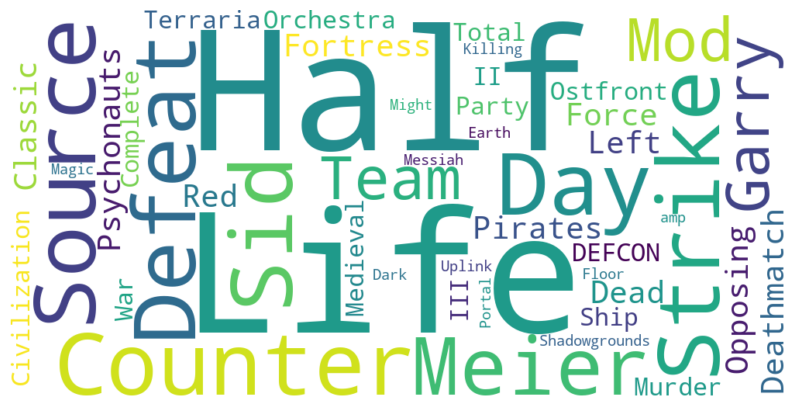

In [4]:
# Se obtiene los títulos de los juegos más comunes (top 25)
top_titles = df_final['title'].value_counts().nlargest(25)

# Se crea una cadena con los títulos de los juegos más comunes
titles_text = ' '.join(top_titles.index)

# Se crea la nube de palabras
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(titles_text)

# Se muestra la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Gráfico de Dispersión de las Horas de Juego por Año.

Text(0, 0.5, 'Año / Year')

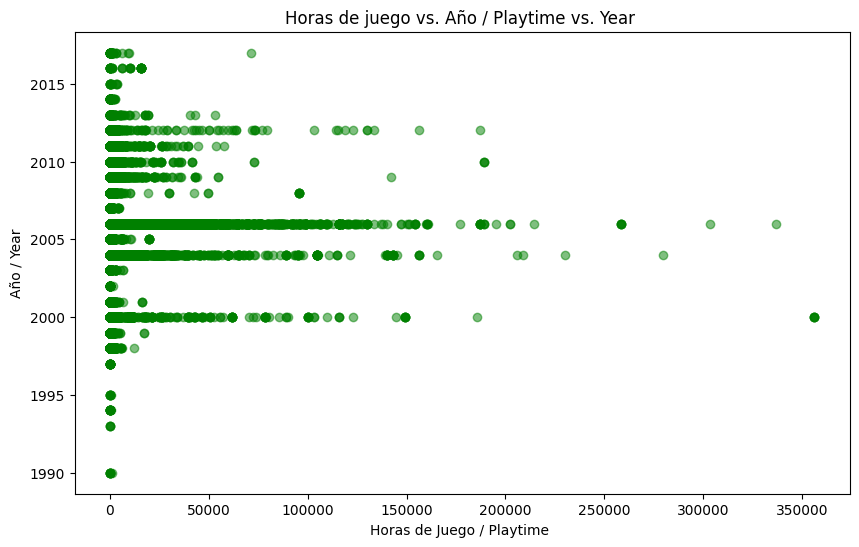

In [5]:
plt.figure(figsize=(10, 6))

# Se crea el gráfico de dispersión 
plt.scatter(df_final['playtime_forever'], df_final['year'], color='green', alpha=0.5)

# Se agregan las etiquetas y titulos
plt.title('Horas de juego vs. Año / Playtime vs. Year ')
plt.xlabel('Horas de Juego / Playtime ')
plt.ylabel('Año / Year')

##  Gráfico de Barras para conocer la cantidad de reseñas 'sentiment_analysis' por año de publicación.

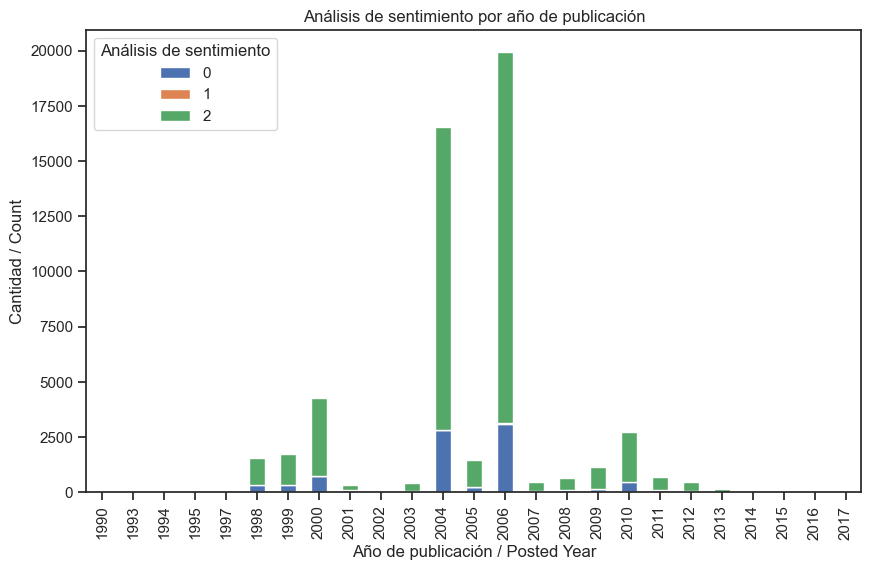

In [6]:
# Se agrupan las columnas 'posted_year´ y 'sentiment_analysis' y se cuenta 
grouped_data = df_final.groupby(['year', 'sentiment_analysis']).size().reset_index(name='count')

# Se pivotean los datos de la columna 'sentiment_analysis' 
pivot_data = grouped_data.pivot(index='year', columns='sentiment_analysis', values='count')

# Se establece el estilo de las gráficas
sns.set(style='ticks')

# Se crea la gráfica de barras apiladas
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Etiquetas y título
plt.xlabel('Año de publicación / Posted Year')
plt.ylabel('Cantidad / Count')
plt.title('Análisis de sentimiento por año de publicación')
plt.legend(title='Análisis de sentimiento', loc='upper left')

# Se muestra la gráfica
plt.show()

##  Gráfico de Barras de las Horas Jugadas por Año y Género.

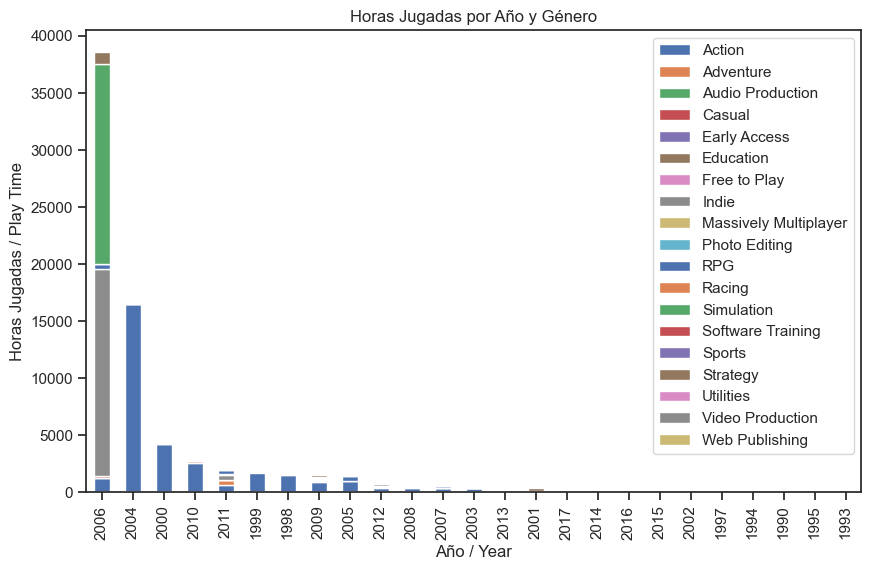

In [7]:
genres = ['Action', 'Adventure', 'Audio Production', 'Casual',
             'Early Access', 'Education', 'Free to Play', 'Indie',
             'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
             'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Web Publishing']

relevant_columns = ['year', 'playtime_forever'] + genres
df_filtered = df_final[relevant_columns].copy()

df_grouped = df_filtered.groupby('year')[genres].sum()
df_grouped['total_playtime'] = df_grouped[genres].sum(axis=1)
df_grouped = df_grouped.sort_values('total_playtime', ascending=False)
df_filtered = df_final[(df_final['year'] >= 2001) & (df_final['year'] <= 2006)][relevant_columns].copy()

df_grouped[genres].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Año / Year')
plt.ylabel('Horas Jugadas / Play Time')
plt.title('Horas Jugadas por Año y Género')
plt.legend(loc='upper right')
plt.show()

### Creación del mapa de correlación de las variables

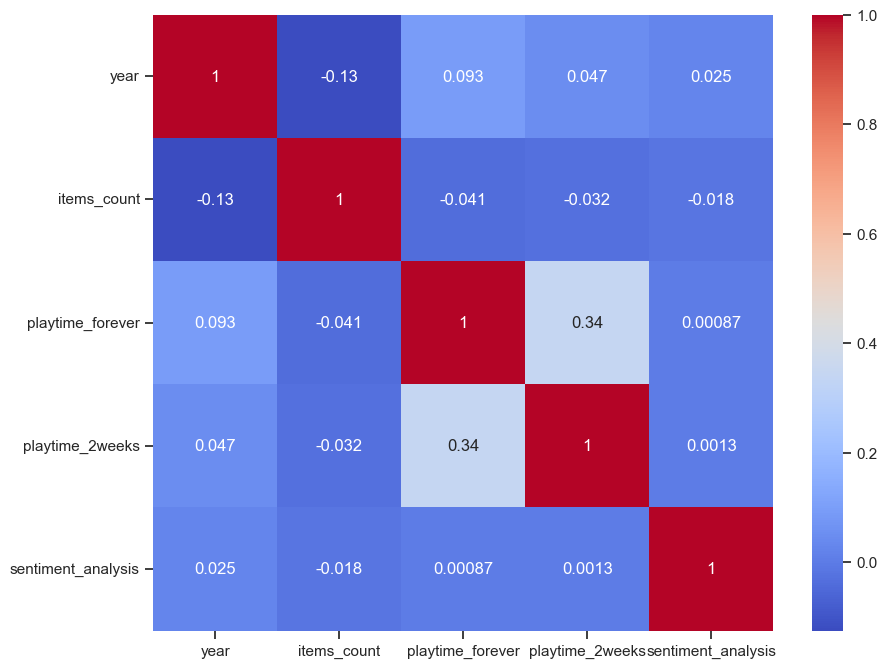

In [8]:

# Se filtra el DataFrame para incluir solo las columnas relevantes (excluyendo 'id')
relevant_columns = df_final_ord.drop(columns=['id'])

# Se calcular la matriz de correlación
corr_matrix = relevant_columns.corr()

# Se crea el gráfico de mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Se muestra el gráfico
plt.show()